Alda-Catalinas C, et al. A Single-Cell Transcriptomics CRISPR-Activation Screen Identifies Epigenetic Regulators of the Zygotic Genome Activation Program. Cell Syst. 2020 Jul 22;11(1):25-41.e9.

In [4]:
source('./data_processing.R')


In [2]:
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# Replicate1

GSM4023607	amplicon_sgRNA_1

In [3]:
input_dir = './GiRAFR_outputs/Alda-Catalinas_CellSystems/sample1/'
output_dir = './figures_results/Alda-Catalinas_CellSystems/sample1'

### UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 103572"
[1] "Wildtype UMI: 125133"
[1] "Mutant UMI: 157815"


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


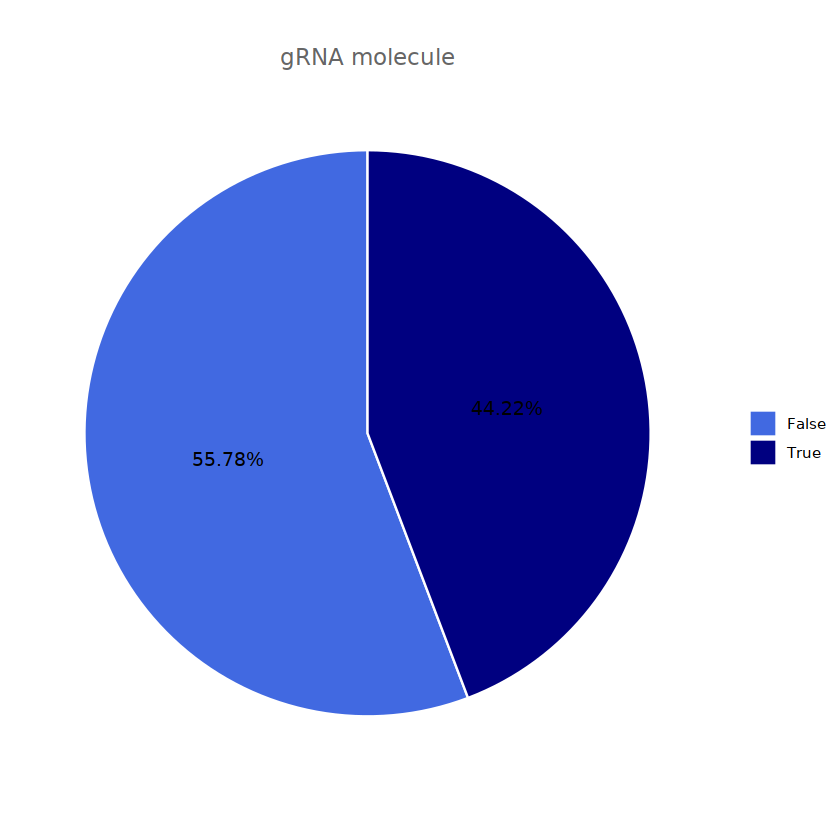

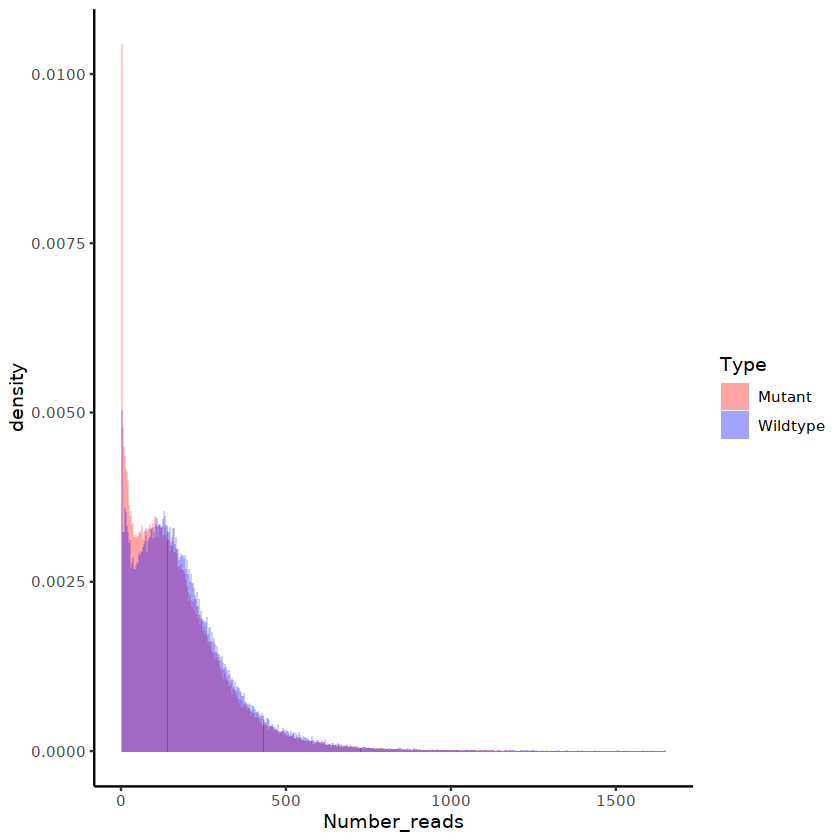

In [5]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


In [6]:
sum(!is.na(gRNA_UMI_variant$Mutation)) # mutant that has structure annotation

sum(grepl('U6',gRNA_UMI_variant$Mutation)) # mutant that has mutation at U6
sum(grepl('gRNA',gRNA_UMI_variant$Mutation))# mutant that has mutation at protospacer
sum(grepl('Rest',gRNA_UMI_variant$Mutation)) # mutant that has mutation at gRNA scaffold

[1] 157806

[1] 822

[1] 16568

[1] 150039

## position Rest < 60

In [8]:
gRNA_UMI_variant.MT <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),]
index <- which(gRNA_UMI_variant$Type == 'False')
index <- index[lapply(str_extract_all(gRNA_UMI_variant.MT$Mutation, regex("\\d+")), max) < 60]
gRNA_UMI_variant.MT <- gRNA_UMI_variant.MT[lapply(str_extract_all(gRNA_UMI_variant.MT$Mutation, regex("\\d+")), max) < 60,]
nrow(gRNA_UMI_variant.MT) # position Rest < 60
nrow(gRNA_UMI_variant) - nrow(gRNA_UMI_variant.MT)

[1] 29722

[1] 253226

In [9]:
index <- index[!is.na(index)]
gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

False 
10.50122

True 
89.49878

[1] "Number of mutant UMI"
[1] "Processed cell number: 103572"
[1] "Wildtype UMI: 253235"
[1] "Mutant UMI: 29713"


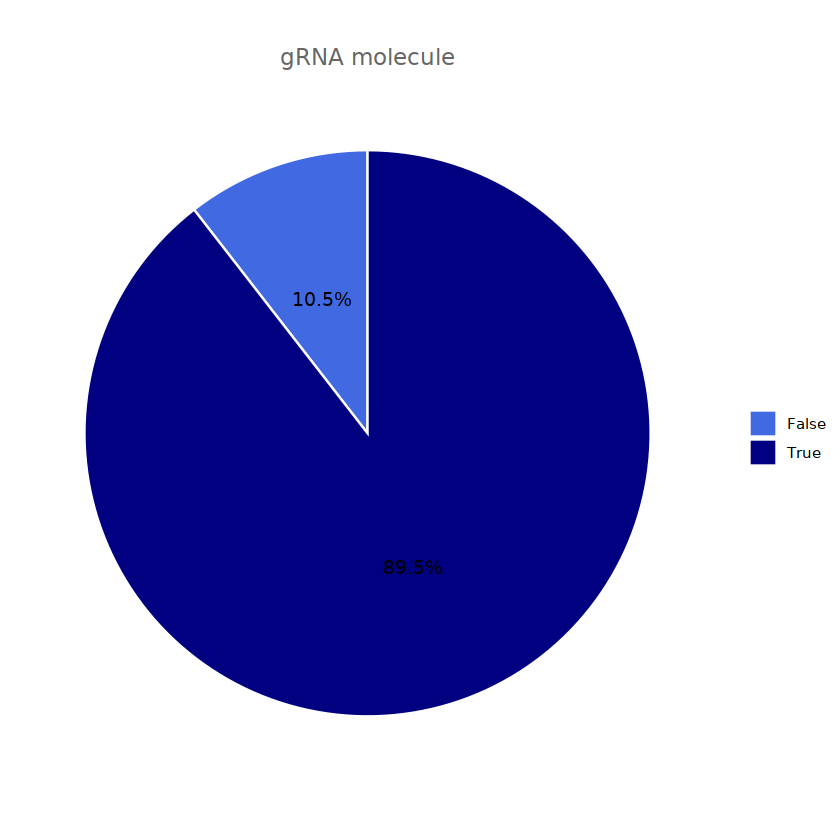

png 
  2

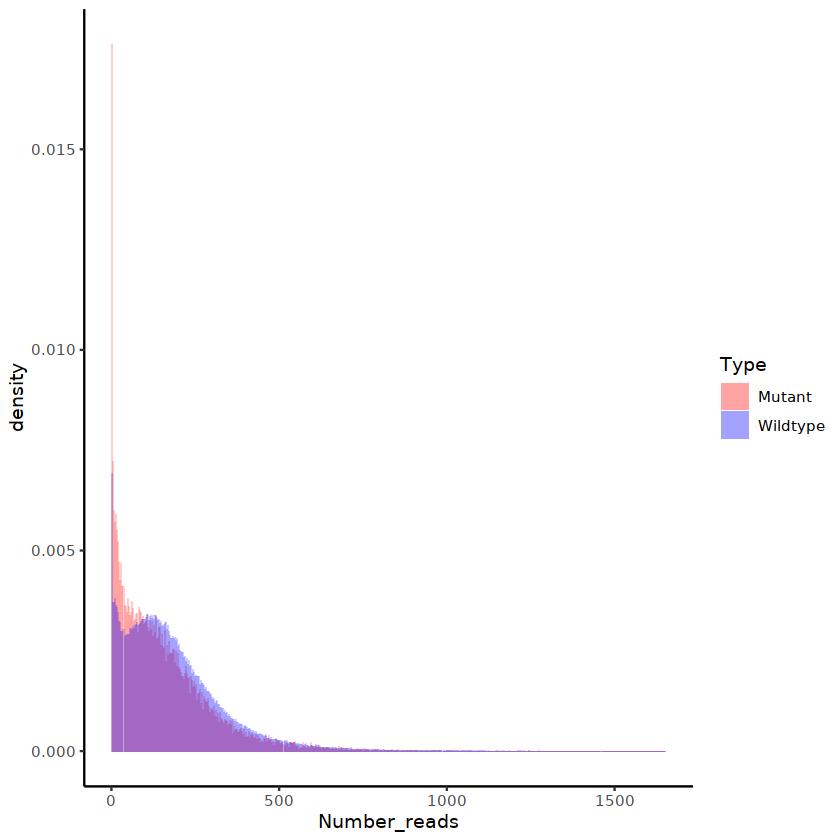

In [10]:
Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### MT.txt

[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13) D(14) D(16) D(18) D(19)  D(2)  D(3) 
10205  9734  1467     1     3     7     5     5     1     1     6   175    42 
 D(4)  D(5)  D(6)  D(7)  D(8)     G  I(1) I(11)  I(2)  I(3)  I(4)  I(5)  I(6) 
   19    19     1     8     4  9207 17903     2  1428    38    11     1     4 
    T 
 9166 
[1] "MT mutation type"

    D     I     S 
 1764 19387 38312 
[1] "MT mutation structure"

 gRNA  Rest    U6 
 9118 49710   635 


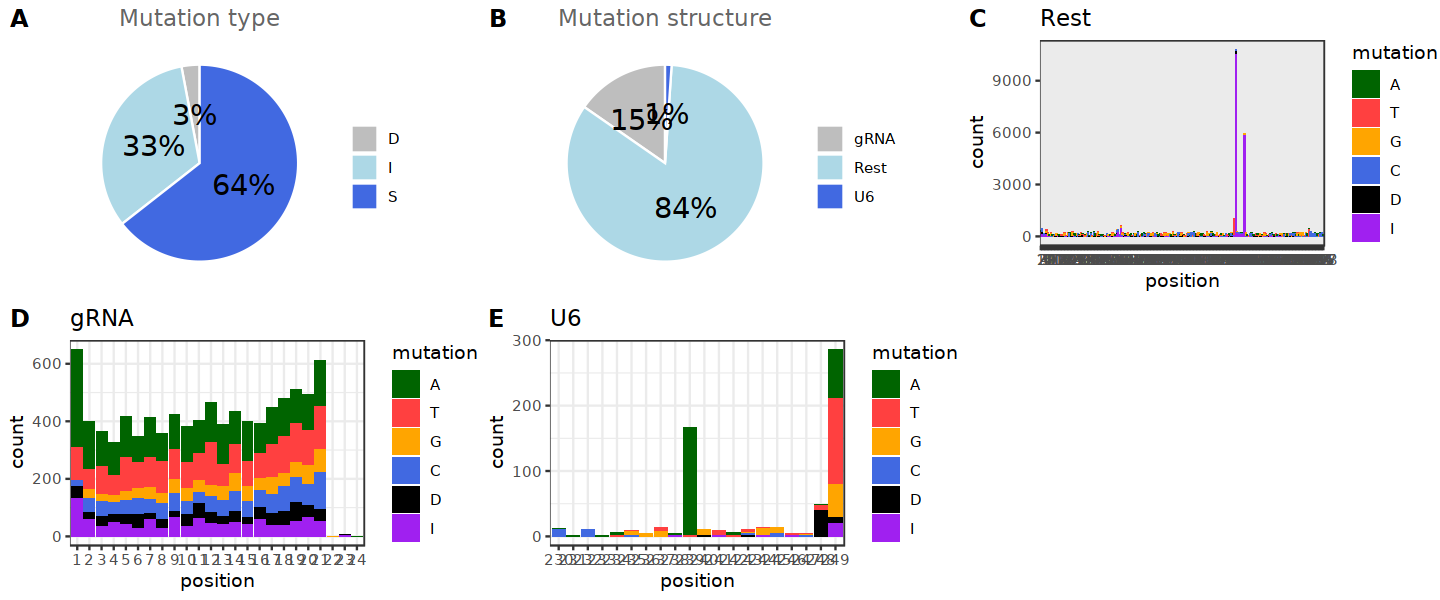

In [11]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)


* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [12]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   1.727   2.000  11.000 

[1] 374

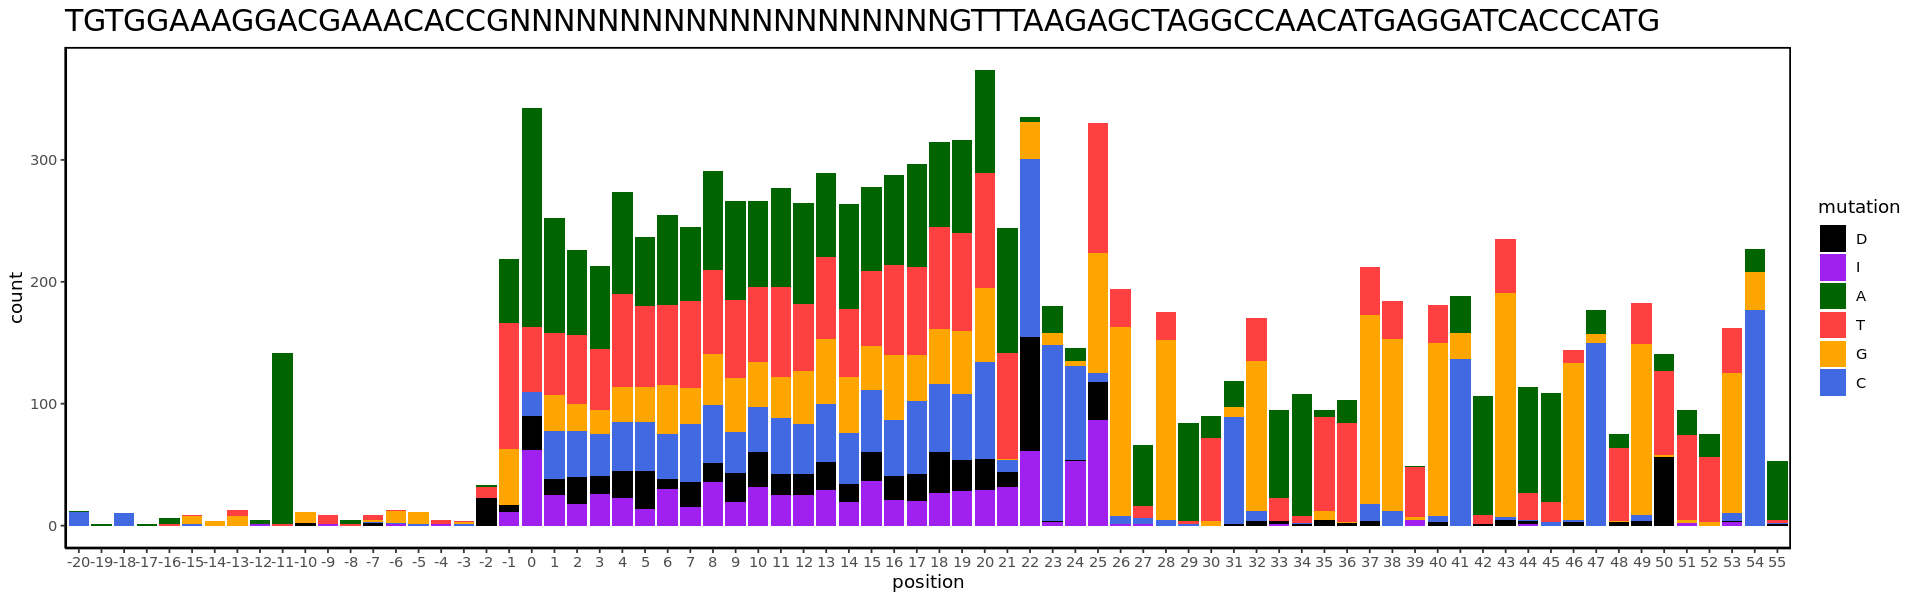

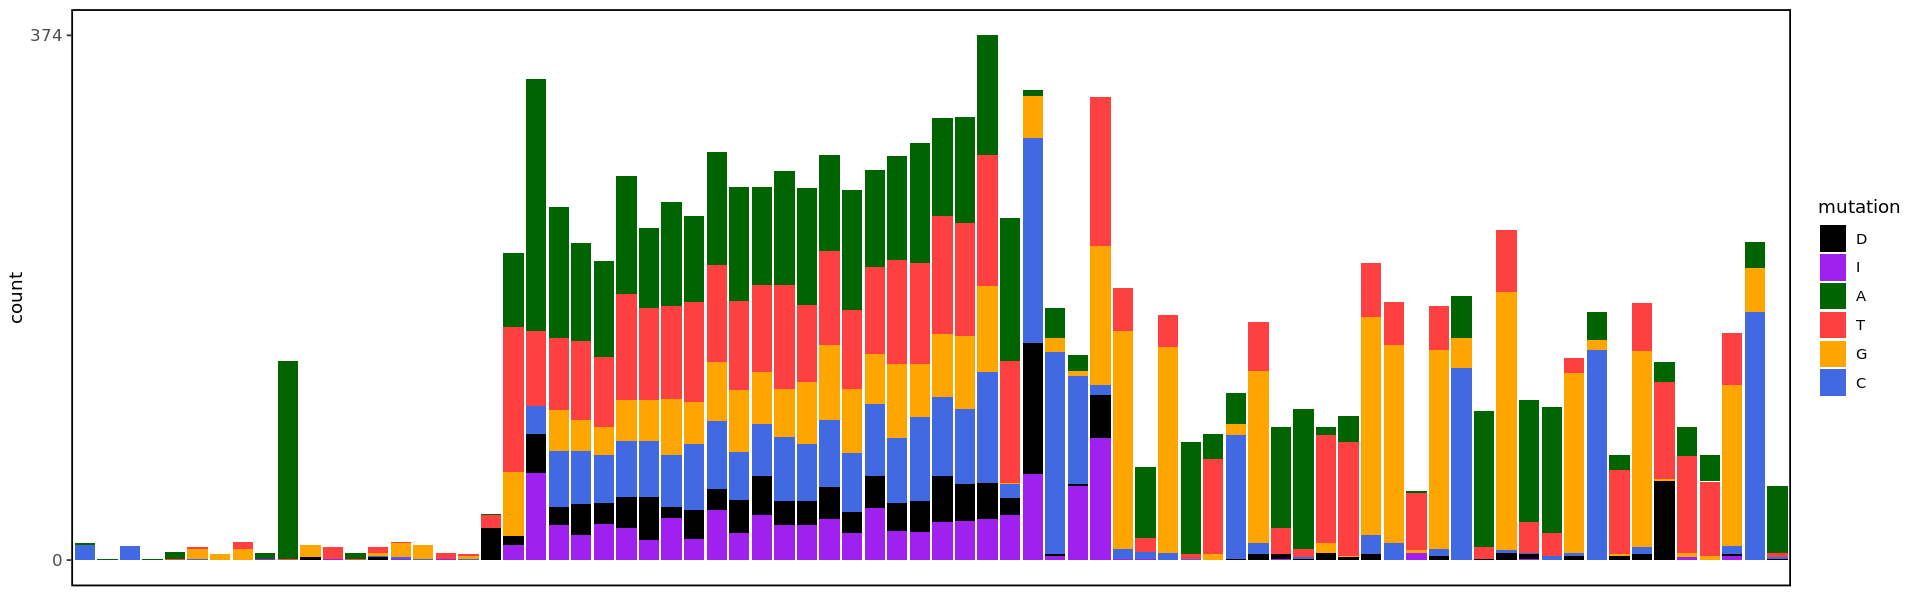

In [14]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'U6'), 'position'] <- MT2[which(MT2$structure == 'U6'), 'position']-250
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20


MT2 <- MT2[-which(MT2$position > 55),]
######### Needs to be put before factor(MT2$position) otherwise will change the dedup
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
max(table(MT2$position))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'TGTGGAAAGGACGAAACACCGNNNNNNNNNNNNNNNNNNNNGTTTAAGAGCTAGGCCAACATGAGGATCACCCATG')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(size=10),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,max(table(MT2$position))))

#dev.off()

# Remove adjusted position > 55 for cell-gRNA assignment


[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13) D(14) D(16) D(18) D(19)  D(2)  D(3) 
10205  9734  1467     1     3     7     5     5     1     1     6   175    42 
 D(4)  D(5)  D(6)  D(7)  D(8)     G  I(1) I(11)  I(2)  I(3)  I(4)  I(5)  I(6) 
   19    19     1     8     4  9207 17903     2  1428    38    11     1     4 
    T 
 9166 
[1] "MT mutation type"

    D     I     S 
 1764 19387 38312 
[1] "MT mutation structure"

 gRNA  Rest    U6 
 9118 49710   635 


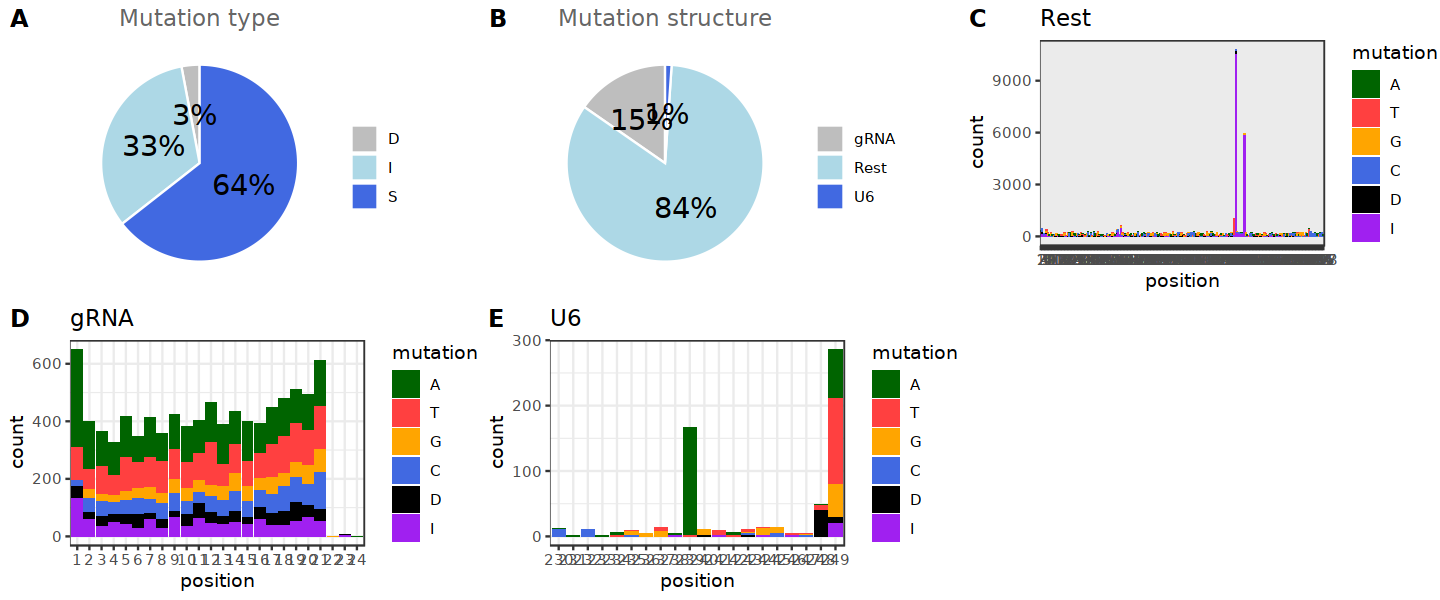

In [14]:
input_dir = './GiRAFR_outputs/Alda-Catalinas_CellSystems/sample1/'
output_dir = './figures_results/Alda-Catalinas_CellSystems/sample1'

MT <- plot_MT_pattern(input_dir, output_dir)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position > 55),]
######### Needs to be put before factor(MT2$position) otherwise will change the dedup
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2_nodedup <- MT2
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

In [16]:
#dim(MT2) # presumed real mutant sgRNAs after removal of TSO artifacts
#MT2_list <- unique(MT2$`variant number`)
#length(MT2_list)

#dim(MT2) # presumed real mutant sgRNAs after removal of TSO artifacts without dedup
MT2_list_nodedup <- unique(MT2_nodedup$`variant number`)
length(MT2_list_nodedup)

[1] 13248

In [17]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)
colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA

In [20]:
cells.gRNA <- cells.gRNA.ori
cells.gRNA.WTcounts <- cells.gRNA[,1:5]
for(i in seq(6,n_col-2,2)){
    MT.df <- cells.gRNA[,i:(i+1)]
    colnames(MT.df) <- c('MT','num_UMI_MT')
    MT.notInlist <- MT.df[!MT.df$MT %in% MT2_list_nodedup,]
    index <- !MT.df$MT %in% MT2_list_nodedup
    MT.notInlist$num_UMI_MT[is.na(MT.notInlist$num_UMI_MT)] <- 0
    cells.gRNA.WTcounts$num_UMI_WT[index] <- cells.gRNA.WTcounts$num_UMI_WT[index] + MT.notInlist$num_UMI_MT
    cells.gRNA[index,i:(i+1)] <- NA # make MT not in list as NA
}
cells.gRNA[,1:5] <- cells.gRNA.WTcounts
for(i in seq(1, nrow(cells.gRNA))){
    num_MT <- (sum(!is.na(cells.gRNA[i,])) - 5)/2 #updated number of gRNA
    if(cells.gRNA[i,5] > 0){
        cells.gRNA$feature_order[i] <- num_MT + 1
    }else{
        cells.gRNA$feature_order[i] <- num_MT
    }
}
# now feature order is no longer accumulated 
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = sum(feature_order))
#cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(is_MT))
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(contain_MT, is_MT))

# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


In [21]:
table(cells.num_features$num_features) 
sum(table(cells.num_features$num_features))


    1     2     3     4     5     6     7 
77901 19251  4784  1209   297    81    10 

[1] 103533

In [22]:
sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
tmp <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0))
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
sum(cells.gRNA[which(cells.gRNA$num_UMI_WT > 0),'feature_order']-1) + sum(cells.gRNA[which(cells.gRNA$num_UMI_WT == 0),'feature_order'])
# cells with mutations (multiplets count as multiple)

[1] 137632

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


[1] 18426

In [23]:
table(cells.gRNA[which(cells.gRNA$num_UMI_WT ==0),'feature_order']) 
# cells have more than 1 mutation of the same gRNA



   1    2    3    4    5    6 
6220 2067  570  113   10    3 

In [24]:
sum(cells.has_MT$has_MT)
# number of cells with mutation
sum(cells.has_MT[which(cells.has_MT$cb %in% cells.num_features[which(cells.num_features$num_features == 1),]$cb),]$has_MT)
# number of single gRNA cells with mutation

[1] 14104

[1] 3932

In [25]:
length(unique(cells.gRNA[which(cells.gRNA$feature_order > 1 & cells.gRNA$num_UMI_WT > 0),'cb'])) 
# cells with both MT and WT of the same gRNA


[1] 5518

In [26]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /vsc-hard-mounts/leuven-data/334/vsc33470/miniconda3/envs/SeuratV5/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] stringr_1.5.0           readr_2.1.4             dplyr_1.1.2            
 [4] tidyr_1.3.0             ggpubr_0.6.0            Seurat_4.9.9.9042      
 [7] SeuratObject_4.9.9.9084 sp_1.6-0                UpSetR_1.4.0           
[10] ggplot2_3.4.2          